# Задача 3

In [8]:
import numpy as np
import prettytable as pt
from matplotlib import pyplot as plt

In [9]:
# производные для функции y' = x^2 + y^2
def der_1(x, y):
    return x ** 2 + y ** 2

def der_2(x, y):
    return 2 * y * der_1(x, y) + 2 * x

def der_3(x, y):
    return 2 * (der_1(x, y) ** 2 + y * der_2(x, y)) + 2

In [10]:
class Tayl:

    def __init__(self, x_0, y_0, x_max, N):
        self.x = np.linspace(x_0, x_max, N)
        self.y_1 = np.array([y_0])
        self.y_2 = np.array([y_0])
        self.y_3 = np.array([y_0])

        self.N = N

        self.step = float((x_max - x_0) / N)

    # первый порядок
    @staticmethod
    def f_1(x, y, h):
        return y + h * der_1(x, y)

    # второй порядок
    @staticmethod
    def f_2(x, y, h):
        return Tayl.f_1(x, y, h) + ((h ** 2) * der_2(x, y)) / 2

    # третий порядок
    @staticmethod
    def f_3(x, y, h):
        return Tayl.f_2(x, y, h) + ((h ** 3) * der_3(x, y)) / 6

    def calc(self):
        for i in range(self.N - 1):
            self.y_1 = np.append(self.y_1, Tayl.f_1(self.x[i], self.y_1[i], self.step))
            self.y_2 = np.append(self.y_2, Tayl.f_2(self.x[i], self.y_2[i], self.step))
            self.y_3 = np.append(self.y_3, Tayl.f_3(self.x[i], self.y_3[i], self.step))

    def make_graph(self):
        plt.grid(True)

        plt.xlabel('x')
        plt.ylabel('y')

        plt.title('Метод Эйлера')

        plt.plot(self.x, self.y_1, color = 'green', label = 'Первый')
        plt.plot(self.x, self.y_2, color = 'red', label = 'Второй')
        plt.plot(self.x, self.y_3, color = 'blue', label = 'Третий')

        plt.legend()
        plt.show()

    def print(self):
        table = pt.PrettyTable()
        table.add_column("x", self.x)
        table.add_column("Первый порядок", self.y_1)
        table.add_column("Второй порядок", self.y_2)
        table.add_column("Третий порядок", self.y_3)

        print(table)
        

In [11]:
class Pic:

    def __init__(self, x_0, y_0, x_max, N):
        self.x = np.linspace(x_0, x_max, N)
        self.y_1 = np.array([y_0])
        self.y_2 = np.array([y_0])
        self.y_3 = np.array([y_0])
        self.y_4 = np.array([y_0])

        self.N = N
    
    # первый порядок
    @staticmethod
    def f_1(x):
        return (x ** 3) / 3

    # второй порядок
    @staticmethod
    def f_2(x):
        return Pic.f_1(x) + (x ** 7) / 42

    # третий порядок
    @staticmethod
    def f_3(x):
        return Pic.f_2(x) + 2 * (x ** 11) / (33 * 63) + (x ** 15) / (15 * 63 * 63)
    
    @staticmethod
    def f_4(x):
        return Pic.f_3(x) +  + 13 * x ** 15 / 218295 + 82 * x ** 19 / 37328445 + 662 * x ** 23 / 10438212015 + 4 * x ** 27 / 3341878155 + x ** 31 / 109876902975

    def calc(self):
        for i in range(self.N - 1):
            self.y_1 = np.append(self.y_1, Pic.f_1(self.x[i]))
            self.y_2 = np.append(self.y_2, Pic.f_2(self.x[i]))
            self.y_3 = np.append(self.y_3, Pic.f_3(self.x[i]))
            self.y_4 = np.append(self.y_4, Pic.f_4(self.x[i]))


    def make_graph(self):
        plt.grid(True)

        plt.xlabel('x')
        plt.ylabel('y')

        plt.title('Метод Пикара')

        plt.plot(self.x, self.y_1, color = 'green', label = 'Первый')
        plt.plot(self.x, self.y_2, color = 'red', label = 'Второй')
        plt.plot(self.x, self.y_3, color = 'blue', label = 'Третий')
        plt.plot(self.x, self.y_4, color = 'magenta', label = 'Четвертый')

        plt.legend()
        plt.show()

    def print(self):
        table = pt.PrettyTable()
        table.add_column("x", self.x)
        table.add_column("Первый порядок", self.y_1)
        table.add_column("Второй порядок", self.y_2)
        table.add_column("Третий порядок", self.y_3)
        table.add_column("Четвертый порядок", self.y_4)

        print(table)
        

In [12]:
x_0 = 0   
x_max = 2   
N = 100    

y_0 = 0

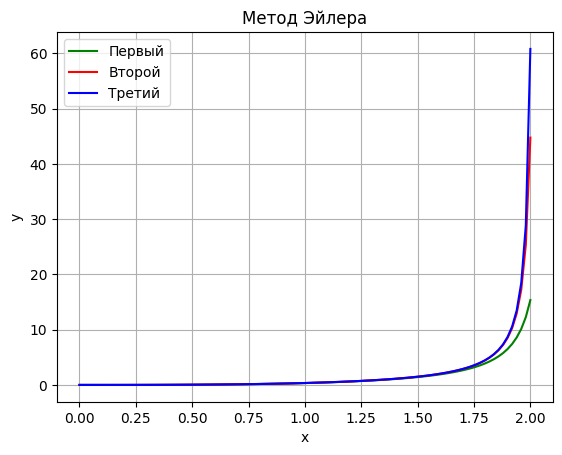

In [13]:

methTayl = Tayl(x_0, y_0, x_max, N)
methTayl.calc()
methTayl.make_graph()

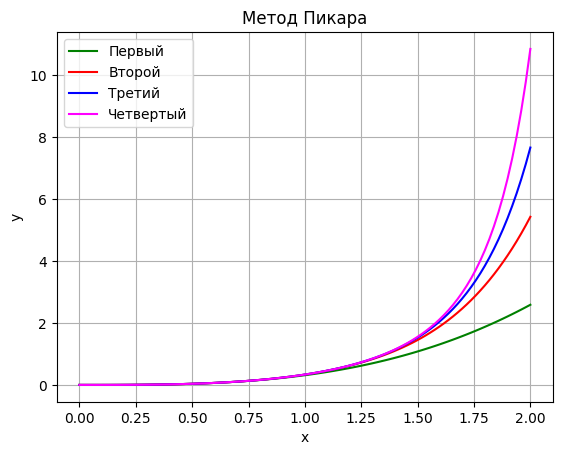

In [14]:

methPic = Pic(x_0, y_0, x_max, N)
methPic.calc()
methPic.make_graph()

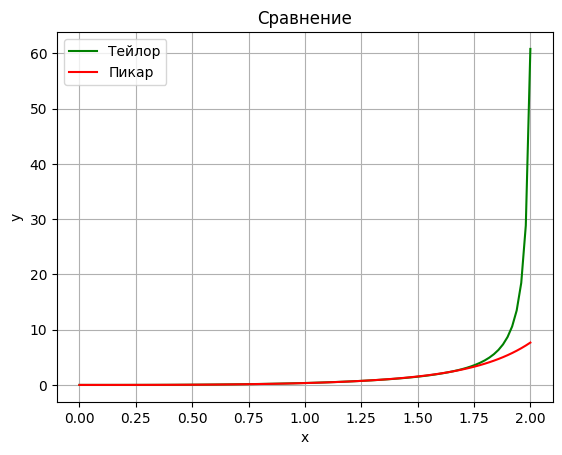

In [15]:
plt.grid(True)

plt.xlabel('x')
plt.ylabel('y')

plt.title('Сравнение')

plt.plot(methTayl.x, methTayl.y_3, color = 'green', label = 'Тейлор')
plt.plot(methTayl.x, methPic.y_3, color = 'red', label = 'Пикар')

plt.legend()
plt.show()